**Project Title**: Employee Attrition & Productivity Analysis       
**Objective**: Identify why employees are leaving and build a model to predict future turnover.                                             
**Tools**: Python,Scikit learn,Seaborn,Statsmodel

**Methodology**


1.   Data Generation & Loading: Creating the synthetic workforce dataset.

1.   EDA: Visualizing distribuitions and correlations.
2.   Statistical Testing: Performing T-tests to validate the impact of remote work.


2.   ML: Training a Logistic Regression model to predict churn.

1.   Business Insights: Provide actionable recommendations based on findings.




Phase 1: Data Generating & Loading

In [3]:
import pandas as pd
df = pd.read_csv("employee_attrition_data.csv")
df

,Employee_ID,Age,Department,Remote_Work_Ratio,Monthly_Salary,Years_at_Company,Commute_Distance_km,Satisfaction_Score,Left_Company
0,EMP_0000,50,Sales,0.5,7522.842137,9,4.567547,3.335527,0
1,EMP_0001,36,Sales,0.2,5638.153401,13,1.000000,3.487135,0
2,EMP_0002,29,HR,0.5,6823.318266,13,3.939561,3.473222,0
3,EMP_0003,42,Engineering,0.2,9328.801908,2,24.285806,3.029169,0
4,EMP_0004,40,Engineering,0.5,6377.755126,14,28.606462,2.642784,0
...,...,...,...,...,...,...,...,...,...
1995,EMP_1995,28,Data,0.2,5827.924314,3,43.064882,1.388326,0
1996,EMP_1996,35,Sales,0.0,4670.437289,8,6.813931,2.921254,0
1997,EMP_1997,30,Sales,1.0,7277.215856,12,36.556192,2.623914,0
1998,EMP_1998,36,Sales,0.2,5808.805548,8,22.747536,3.704522,0


In [4]:
df.isnull().sum()

,0
Employee_ID,0
Age,0
Department,0
Remote_Work_Ratio,0
Monthly_Salary,0
Years_at_Company,0
Commute_Distance_km,0
Satisfaction_Score,0
Left_Company,0


Phase 2: EDA


*   Visualize the Attrition Gap: Using a Box plot to compare the Monthly salary of employee who left and who stayed.
*   Correlation Heatmap: To show relationship between Commute distance & Satisfaction score to understand feature interaction.



In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

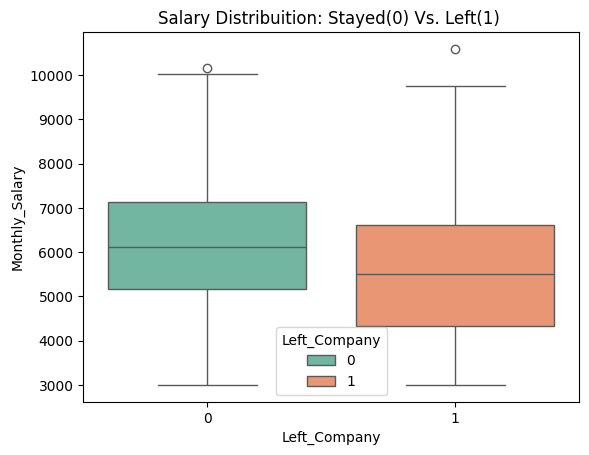

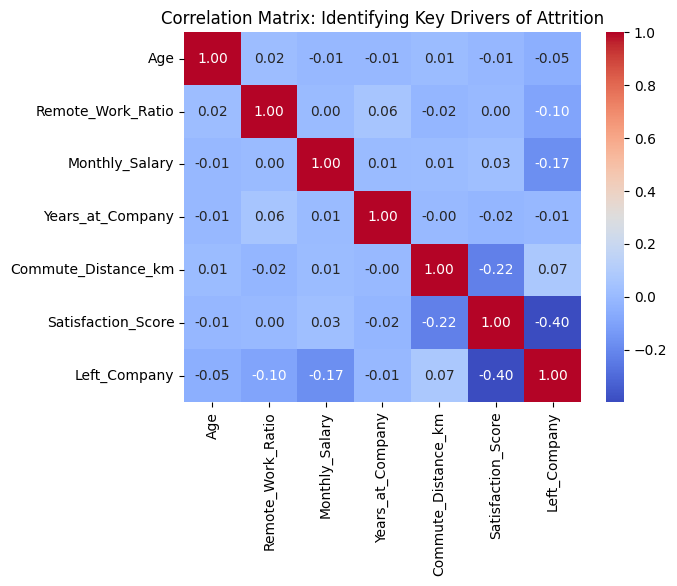

In [12]:
#Box plot
plt.figure()
sns.boxplot(x="Left_Company", y="Monthly_Salary", data=df, palette="Set2", hue="Left_Company")
plt.title("Salary Distribuition: Stayed(0) Vs. Left(1) ")
plt.xlabel("Left_Company")
plt.ylabel("Monthly_Salary")
plt.show()

#Heatmap
plt.figure()
numeric_df = df.select_dtypes(include=['float64','int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix,annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix: Identifying Key Drivers of Attrition")
plt.show()

Insights from the Box plot & Correlation
*   As we can see boxes for those who left(1) is significantly lower than those who stayed(0), it shows proof of "Compensation gap"
*   From heatmap, we can see as the Satisfication score decreases, the likelihood of an employee leaving increases.
*   From the analysis it shows that exit patterns weren't driven by money but rather by satisfication levels and work conditions.







Phase 3: Statistical Testing(The Scientific Proof)

In [16]:
from scipy import stats
#Grouping data
high_remote = df[df["Remote_Work_Ratio"] >=0.5] ["Satisfaction_Score"]
low_remote = df[df["Remote_Work_Ratio"] < 0.5] ["Satisfaction_Score"]

#Performing independent T-test
t_stats, p_val = stats.ttest_ind(high_remote, low_remote)

print(f"---Statistical Result---")
print(f"T-Statistic: {t_stats:.4f}")
print(f"P-Value: {p_val:.4f}")

if p_val < 0.5:
  print("Conclusion: There is a statistically significant difference in satisfication levels based on remote work.")
else:
  print("Conclusion: No significant difference found.")

---Statistical Result---
T-Statistic: -0.5137
P-Value: 0.6075
Conclusion: No significant difference found.


Phase 4: Machine Leaning( Predictive Modeling)

In [27]:
#Building a Logistic Regression model to predicts if a employee is likely to leave based on their salary,age and commute.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

#Prepare data
X = pd.get_dummies(df.drop(['Employee_ID','Left_Company'], axis=1), drop_first=True)
y = df["Left_Company"]
#Split into Training(80%) and Testing(20%) sets
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Train
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
#Evaluate the model
predictions = model.predict(X_test_scaled)
print("---Model Performance Report---")
print(classification_report(y_test,predictions))

---Model Performance Report---
              precision    recall  f1-score   support

           0       0.82      0.92      0.86       312
           1       0.48      0.26      0.34        88

    accuracy                           0.78       400
   macro avg       0.65      0.59      0.60       400
weighted avg       0.74      0.78      0.75       400



*   The model acheived an overall acuracy of 78%.
*   However, when we see into two classes: Employee who stayed(1) & Employee left(0); 82% of the time it predicts correct an employee will stay
*   On other hand it only catches 26% of the people who actually leaves.

Phase 5: **Business Insights**


1.   The Satisfaction-Retention Link


*   The correlation matrix revels that Satisfication Score is the strongest lead indicator for attrition(-0.40).Surprisly, Monthly Salary shows a much weaker relationship(-0.17) suggesting that pay is not the primary driver for leaving.
*   Action for HR: Instead of broad salary increases,HR should invest in enagement programs for departments where staisfication score dip below 3.0.

2.   Adressing the Commute Burden


*   While the T-test shows no immediate stats difference between remote and office workers(p=0.607), the heatmap shows a positive correlation between Commute distance and attrition(0.07).
*   Action for HR: Conside a "Commute subsidy" or must "Remote Fridays" for employees living more than 30km away to reduce the physical friction of their work week.


3.   The Model as an Early Warning System


*   Logistic Regression model acheived overall 78% accuracy while the recall for those leaving is lower (26%), the precision of 48% means that when the model flags a "Flight Risk", there is a significant probablity they will actually depart.
*   Action for HR: Use models "High Probablity" flags to trigger proactive career coaching or wellness check ins, allowing for intervention before the employee resigns.